<a href="https://colab.research.google.com/github/cfreeman22/CreditCardChurnPrediction/blob/main/CreditCardUsersChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit card churn Prediction
Which customer is most likely to churn?
Presented By Christian Freeman  March 2022

## Project Planning
## PLAN ==> Acquire ==> Prepare ==> Explore ==> Model &Evaluate ==> Deliver

 
## Background & Context

The Thera bank recently saw a steep decline in the number of credit card users. Credit cards are a good source of income for banks because of the different kinds of fees the banks charge, such as annual fees, balance transfer fees, cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers leaving credit cards services would lead banks to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas.
Goals and objectives
Understanding consumer behavior can be quite challenging, especially when the product we offer our customers is a service rather than a tangible physical product.
My goal in this project is to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cardsIn the case of predicting which customer is most likely to churn, I will perform the following:

- Prepare the data for visualization using a customized module wrangle.py
- Identify patterns and insights
- Document key observations and relationships between variable

- Identify the characteristics of customers who are more likely to churn and the potential reasons for this behavior.
- Build a ML model to predict which customers may stop using credit cards so that recommendations are made based on the findings to help increase the chances of targeting the right customer.
- I will be using Python, Pandas, Matplotlib, Seaborn, and Scikit-Learn libraries to analyze and create a ML classification model.

## Initial Questions
- What are the unique characteristics of our customers?
- What factors increase their chances of churning?
- can we predict credit cards subscribers' behavior?

## Executive Summary
Findings Include:

In [17]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np
import wrangle
# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# To supress warnings
import warnings

warnings.filterwarnings("ignore")

 

## Acquire the Data

In [2]:
raw = pd.read_csv("BankChurners.csv")

In [3]:
# Checking the number of rows and columns in the data
raw.shape

(10127, 21)

In [4]:
# let's create a copy of the data
df = raw.copy()

In [5]:
# let's view the first 5 rows of the data
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [6]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

In [8]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

In [9]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [10]:
# let's view the statistical summary of the non-numerical columns in the data
df.describe(exclude=np.number).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [11]:
# Checking for nulls
df.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [12]:
# Descriptives Statistics
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,NaN,NaN,NaN,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.000,NaN,NaN,NaN,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.000,NaN,NaN,NaN,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Education_Level,8608,6,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,9378,3,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.000,NaN,NaN,NaN,35.928,7.986,13.000,31.000,36.000,40.000,56.000


In [13]:
# Value counts of all variables
for column in df.columns.to_list():
    print(df[column].value_counts())
    print('===================================')
    print()

768805383    1
711784908    1
720133908    1
803197833    1
812222208    1
            ..
796903083    1
716014983    1
712521783    1
780045708    1
714337233    1
Name: CLIENTNUM, Length: 10127, dtype: int64

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: Customer_Age, dtype: int64

F    5358
M    4769
Name: Gender, dtype: int64

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

Graduate         3128
High School      2013
Uneducated       1487
Colleg

### Observations
-

## Data Preparation

#### data preprocessing

- Dropping the ID CLIENTNUM column

In [14]:
# enrollee_id is unique for each candidate and might not add value to modeling
df.drop(["CLIENTNUM"], axis=1, inplace=True)

In [19]:
cat_var = ['Attrition_Flag', 'Education_Level', 'Card_Category', 'Total_Relationship_Count', 'Marital_Status', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
          'Gender','Income_Category','Dependent_count']
cat_var2 = ['Education_Level', 'Card_Category', 'Total_Relationship_Count', 'Marital_Status', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
          'Gender','Income_Category','Dependent_count']
target = 'Attrition_Flag'
quant_var = ['Customer_Age', 'Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
             'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Total_Amt_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [23]:
for x in cat_var:
  df[x] = df[x].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

## Exploratory Data Analysis

### Univariate Analysis Numeric Columns

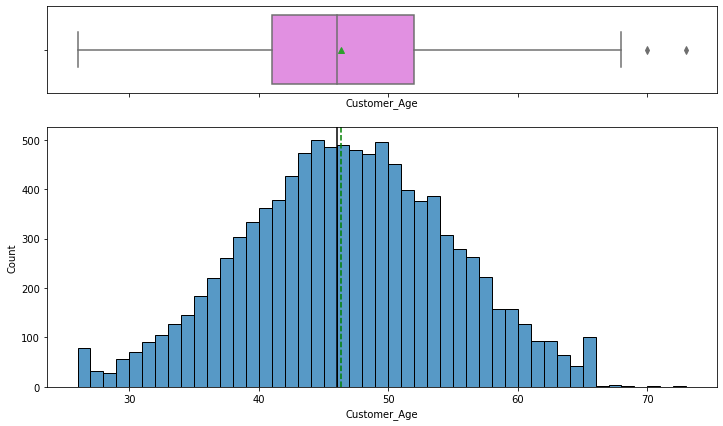

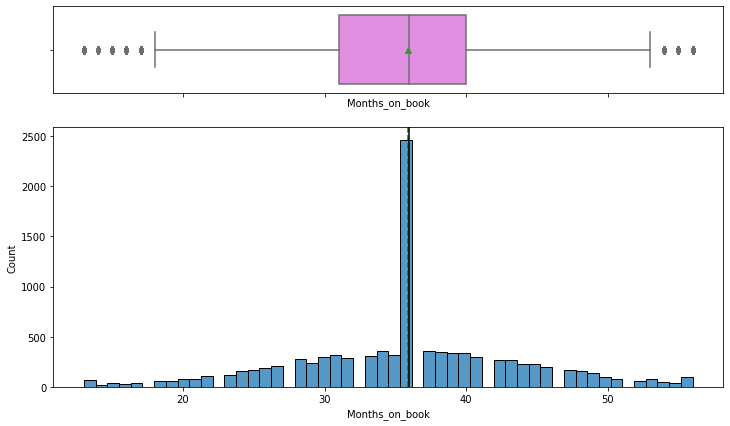

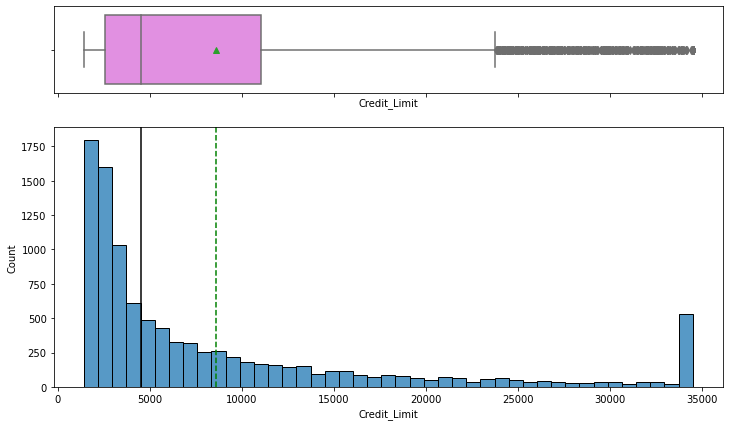

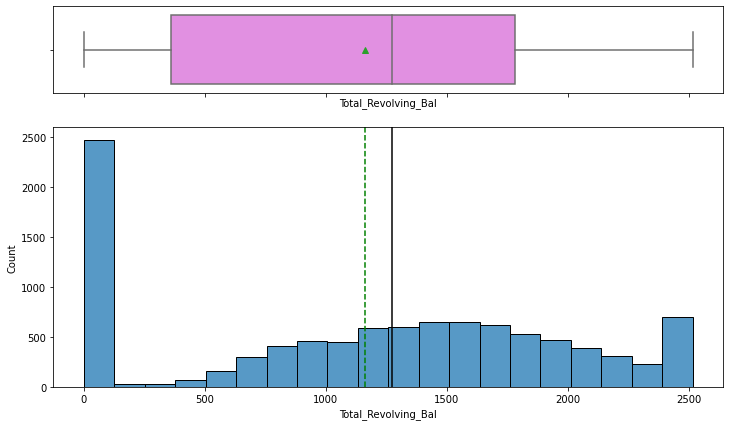

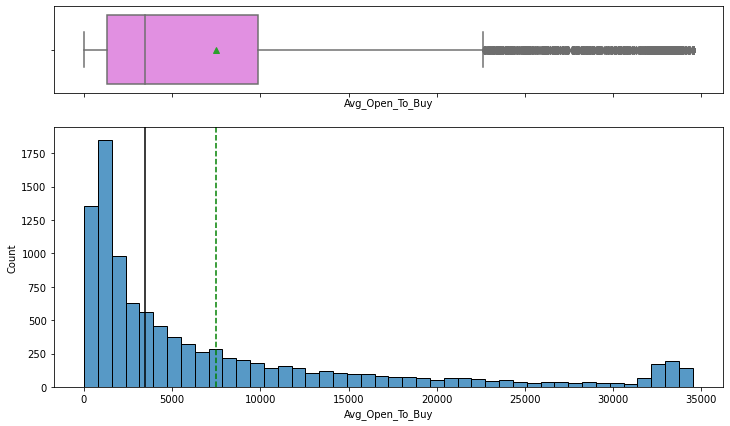

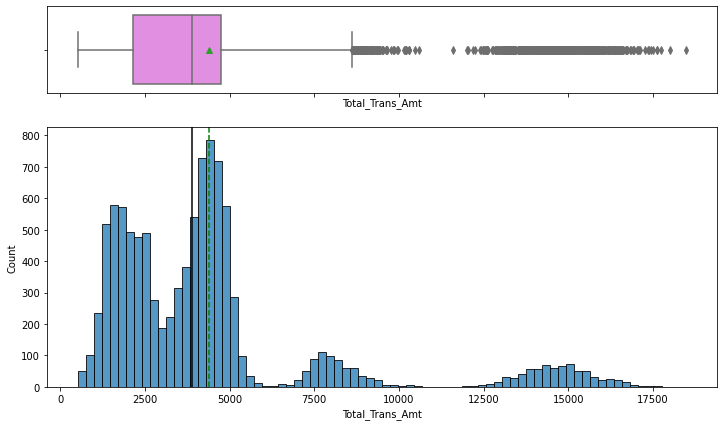

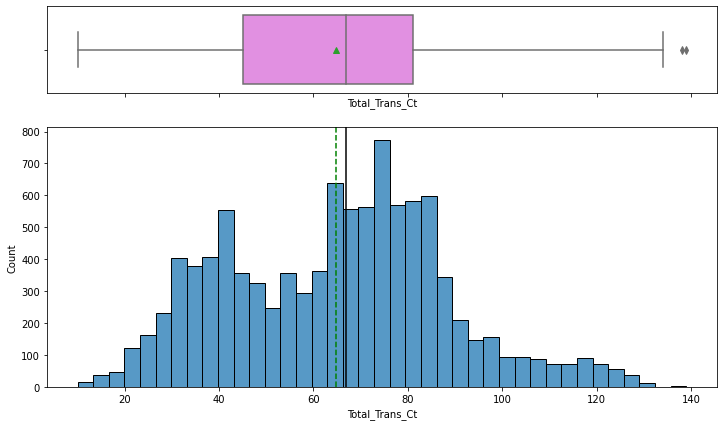

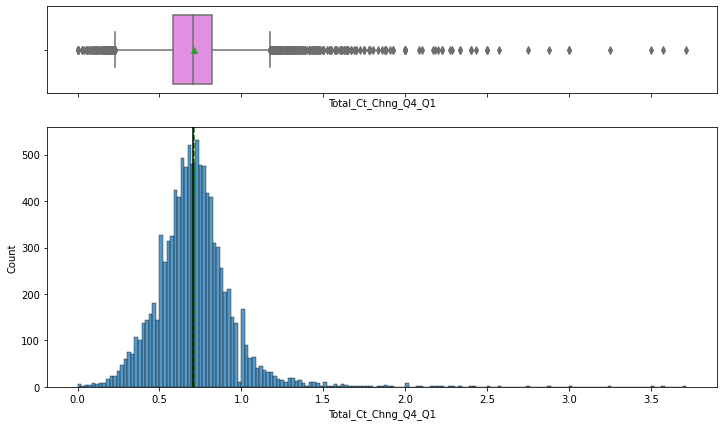

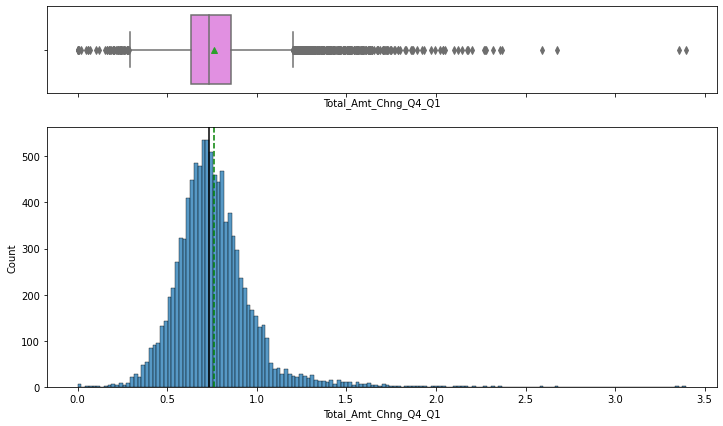

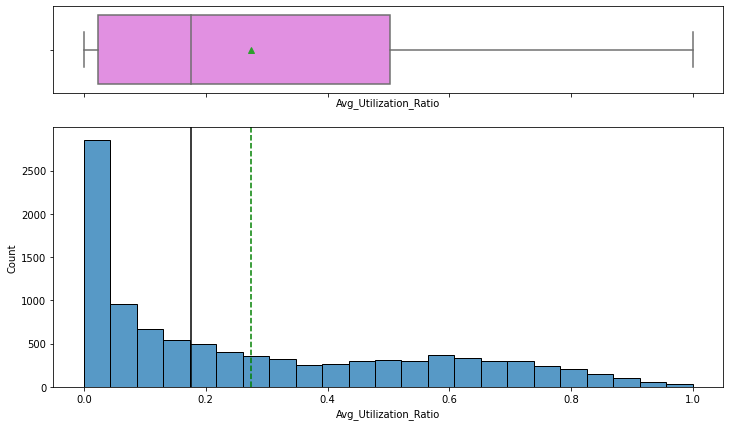

In [20]:
for x in quant_var:
    wrangle.histogram_boxplot(df, x) #Analysing numeric variables using our predefined module stored in the wrangle file

##### Takeaway For univariate numeric columns
-

### Univariate Analysis categorical Columns

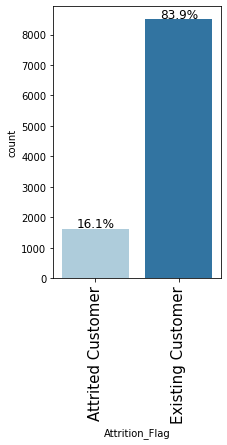

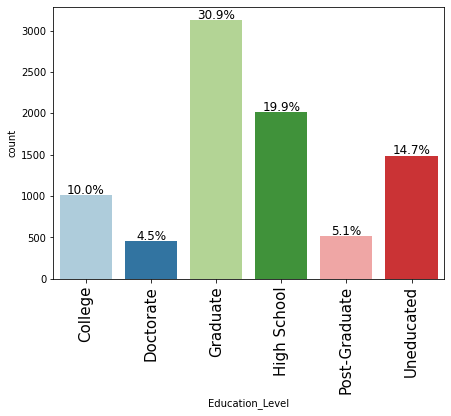

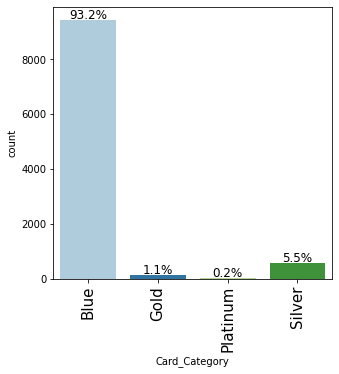

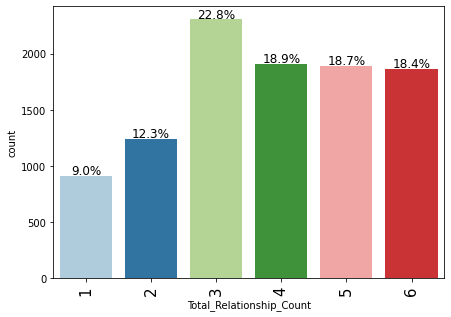

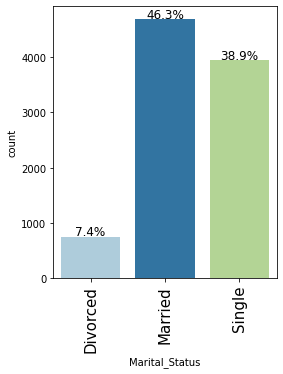

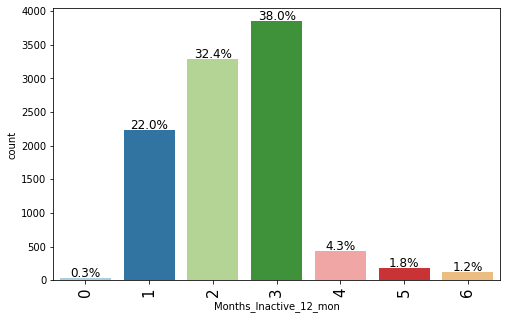

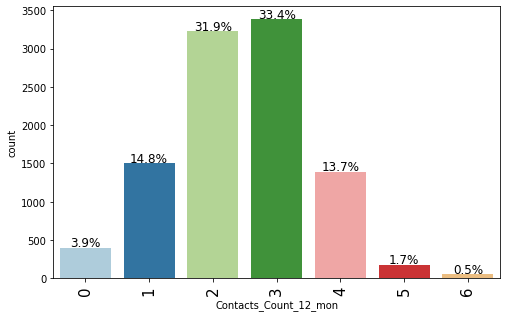

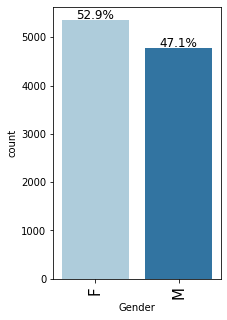

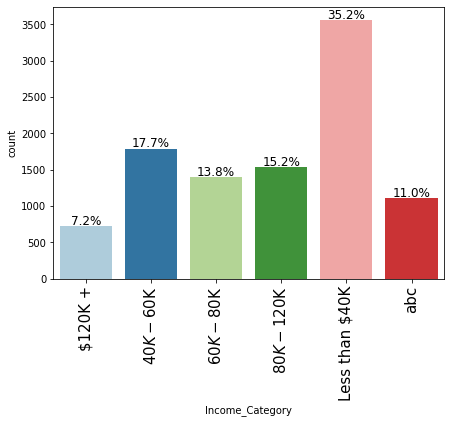

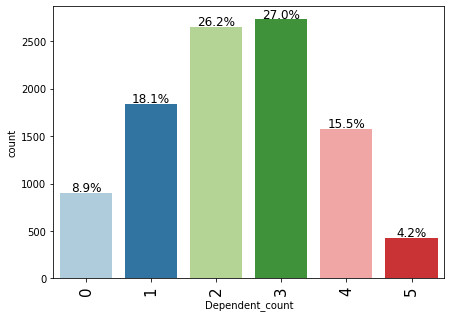

In [21]:
for x in cat_var:
    wrangle.labeled_barplot(df, x, perc=True) #Analysing categorical variables using our predefined module stored in the wrangle file

#### Takeaway For univariate categorical columns

### Bivariate Analysis

#### Statistical Hypothesis
Although I performed statistical tests on many variables as it relates to the product taken, i will mention the hypothesis of of 5 question and will give a brief explanation of other tests.

- Question 1) H0 = The Average of the customer signing up for a trip is the same in each designation group.
- Question 1) H1 = The Average of the customer signing up for a trip is different in each group.
- Question 2) H0 = The Average of customers signing up for a trip is the same in those who have a passport and those who do not.
- Question 2) H1 = The Average of customers signing up for a trip is NOT the same in those who have a passport and those who do not.
- Question 3) H0 = The Average of customers signing up for a trip is the same in all marital status groups.
- Question 3) H1 = The Average of customers signing up for a trip is different in each subgroup.
- Question 4) H0 = The Average of customers signing up for a trip is the same for each type of contract.
- Question 4) H1 = The Average of customers signing up for a trip is different in each contract subgroup.
- Question 5) H0 = The Average of customers signing up for a trip is the same for each occupation group.
- Question 5) H1 = The Average of customers signing up for a trip is different in each occupation group.

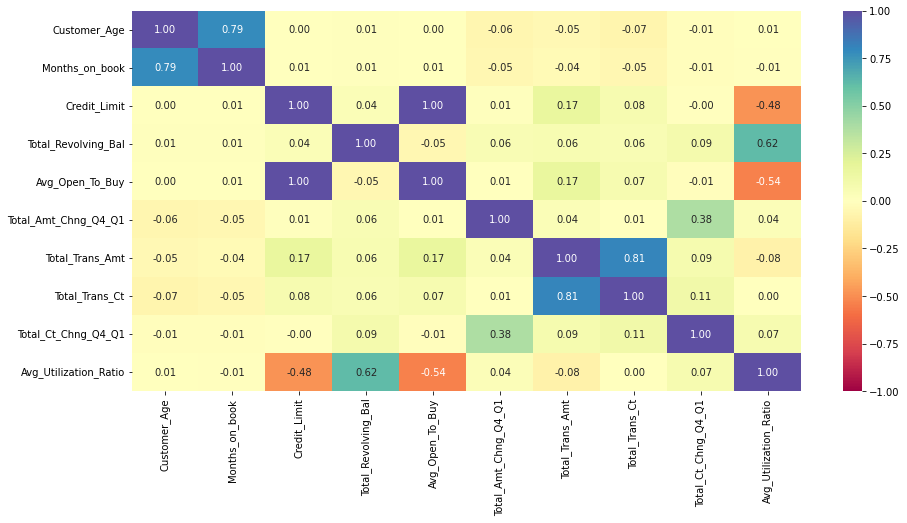

In [26]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

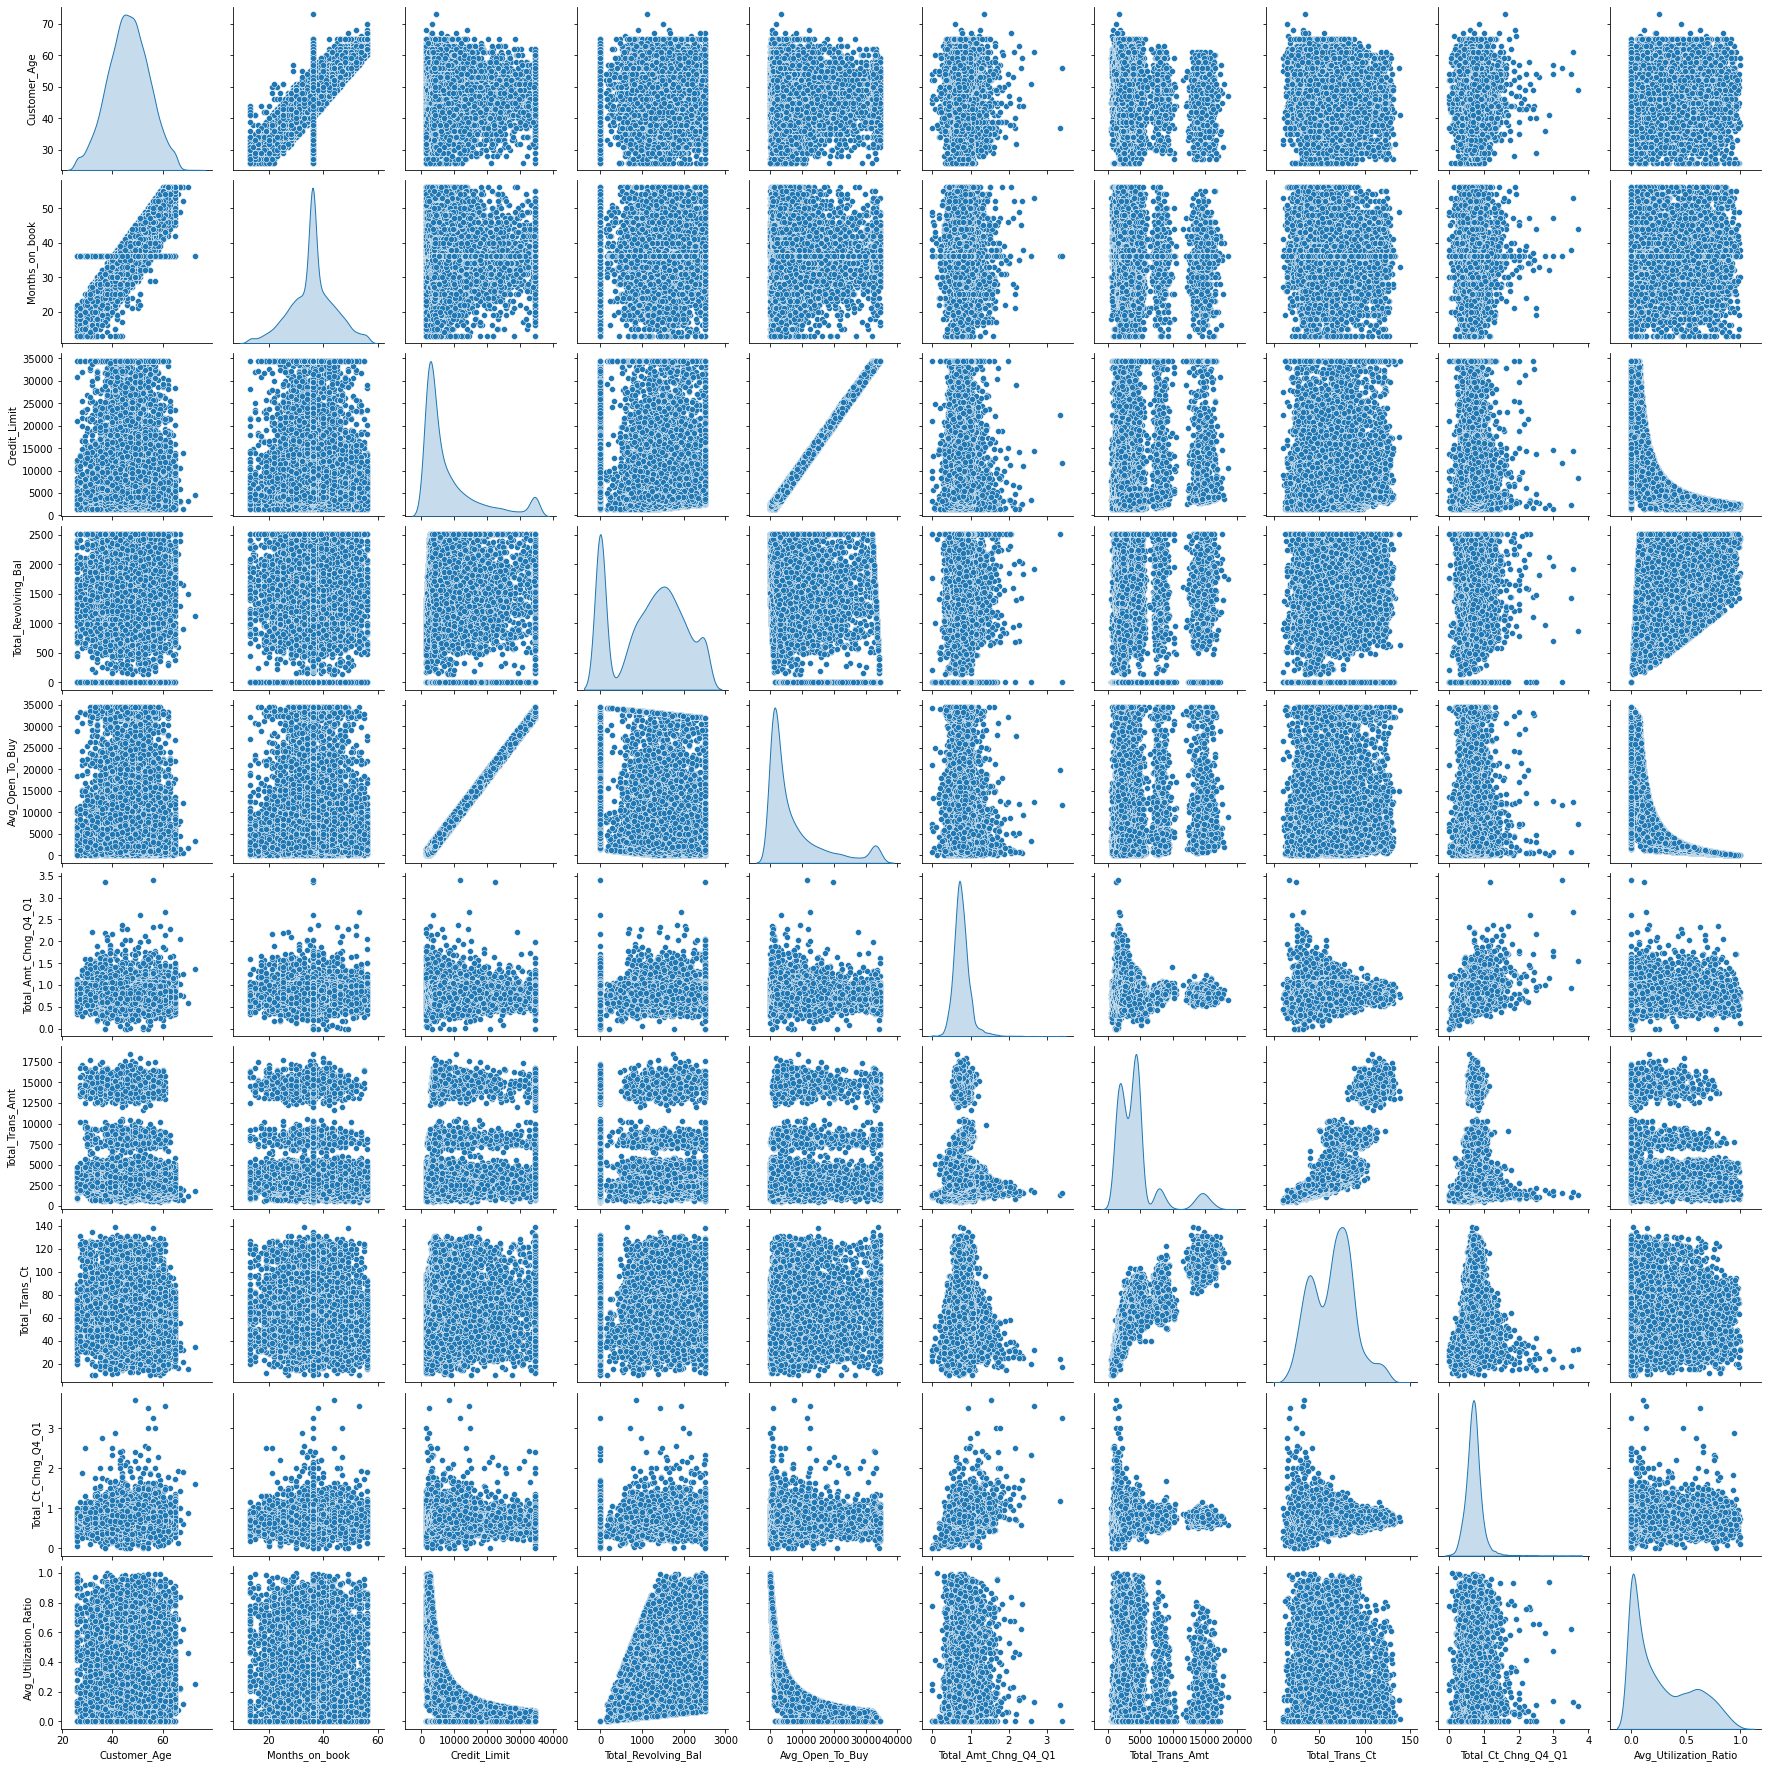

In [27]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

In [25]:
# Bivariate Analysis 
wrangle.explore_bivariate(df, target, cat_var2, quant_var)

Education_Level 
_____________________



TypeError: ignored

<Figure size 576x576 with 0 Axes>

## Modeling & Evaluation

## Conclusion & Recomeendations